In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
purchase = pd.read_excel("Purchase.xlsx")

In [3]:
purchase["year"] = purchase["Podate"].dt.year

In [4]:
purchase["month"] = purchase["Podate"].dt.month

In [5]:
purchase["month_name"] = purchase["Podate"].dt.month_name(locale="English")

In [6]:
purchase = purchase[["EBS PO", "Podate", "year", "month","month_name", "Po lineno", "Po status", "PO Cancel", "Vendor Name",
          "Class", "Main Class", "Categories", "Itemcode", "Itemname", "Unit", "Unit Price",
          "Total", "Order Qty.", "RCV Qty."]]

In [7]:
purchase["PO Cancel"] = purchase["PO Cancel"].fillna("No").copy()

In [8]:
purchase = purchase[purchase["PO Cancel"]== "No"]

In [9]:
purchase.shape

(68133, 19)

In [10]:
purchase["RCV Qty."] = purchase["RCV Qty."].fillna(0).copy()

In [11]:
purchase = purchase[purchase["RCV Qty."] > 0]

In [12]:
purchase["Receiving Total"] = purchase["RCV Qty."].mul(purchase["Unit Price"]).copy()

In [13]:
purchase.shape

(60314, 20)

In [14]:
purchase.head(2)

,EBS PO,Podate,year,month,month_name,Po lineno,Po status,PO Cancel,Vendor Name,Class,Main Class,Categories,Itemcode,Itemname,Unit,Unit Price,Total,Order Qty.,RCV Qty.,Receiving Total
1,3847,2019-01-24,2019,1,January,1,CLOSED,No,F. G. INDUSTRIAL EQUIPMENTS (PVT.) LTD.,5102,Electrical,Battery,5102-00019-0000,BATTERY CONNECTOR HANDLE GRIP PART NO: 220-00005,Numbers,2000.0,2000.0,1.0,1.0,2000.0
2,6146,2019-09-25,2019,9,September,2,CLOSED,No,F. G. INDUSTRIAL EQUIPMENTS (PVT.) LTD.,5234,Mechanical,Mechanical Miscellaneous Item,5234-00419-0000,AIR FILTER ELEMENT PRI (PART#: A408446),Numbers,4500.0,13500.0,3.0,3.0,13500.0


In [15]:
Jul_22_Jun_23 = purchase[((purchase["year"] == 2022) & (purchase["month"] >= 7)) | ((purchase["year"] == 2023) & (purchase["month"] < 7))]
Jul_22_Jun_23 = Jul_22_Jun_23[(Jul_22_Jun_23["Main Class"] != "Primary Packaging Materials") & (Jul_22_Jun_23["Main Class"] != "Raw Materials") & (Jul_22_Jun_23["Main Class"] != "Secondry Packaging Materials")]

In [16]:
Jul_23_Dec_23 = purchase[(purchase["year"] == 2023) & (purchase["month"] >= 7)]
Jul_23_Dec_23 = Jul_23_Dec_23[(Jul_23_Dec_23["Main Class"] != "Primary Packaging Materials") & (Jul_23_Dec_23["Main Class"] != "Raw Materials") & (Jul_23_Dec_23["Main Class"] != "Secondry Packaging Materials")]

# Category Wise Spend

In [17]:
pd.set_option('display.float_format', '{:,.2f}'.format)
cat_Jul_22_Jun_23 = Jul_22_Jun_23.groupby("Main Class")["Receiving Total"].sum()
cat_Jul_22_Jun_23

Main Class
Auto Spares / Accessories                  3,327,355.05
Electrical                                 8,044,505.92
Furniture and Fixture                         38,850.00
General Consumable                        47,157,986.48
General Non-Inventory Materials              636,409.67
HVAC / Air Conditioning                    8,155,141.00
House Keeping                              2,728,573.09
Kitchen / Canteen                         34,421,173.24
Mechanical                                10,343,151.45
Other Assets                               2,521,200.00
Plant, Machinery, Moulds and Equipments   11,923,947.03
Plumbering and Sanitory                    2,359,552.00
Quality Control Consumables                6,597,052.00
Sales and Promotion                        3,990,406.10
Stationery                                 2,452,904.45
Name: Receiving Total, dtype: float64

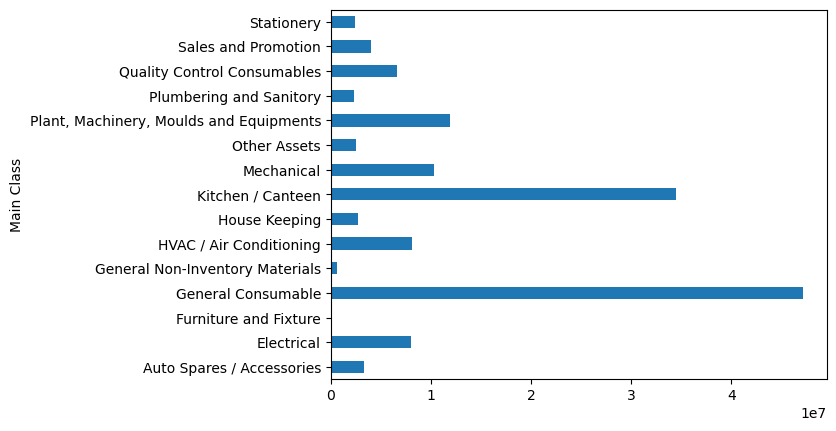

In [18]:
cat_Jul_22_Jun_23.plot.barh()
plt.show()

In [19]:
pd.set_option('display.float_format', '{:,.2f}'.format)
cat_Jul_23_Dec_23 = Jul_23_Dec_23.groupby("Main Class")["Receiving Total"].sum()
cat_Jul_23_Dec_23

Main Class
Auto Spares / Accessories                  1,489,001.83
Electrical                                95,055,365.11
Furniture and Fixture                        512,000.00
General Consumable                        30,235,916.60
General Non-Inventory Materials              331,713.33
HVAC / Air Conditioning                    3,806,494.00
House Keeping                              1,554,272.97
Kitchen / Canteen                         14,356,945.10
Mechanical                                 3,285,439.20
Other Assets                                   2,300.00
Plant, Machinery, Moulds and Equipments      950,450.00
Plumbering and Sanitory                      545,424.50
Quality Control Consumables                3,804,125.15
Sales and Promotion                        1,622,998.10
Stationery                                 1,557,599.20
Name: Receiving Total, dtype: float64

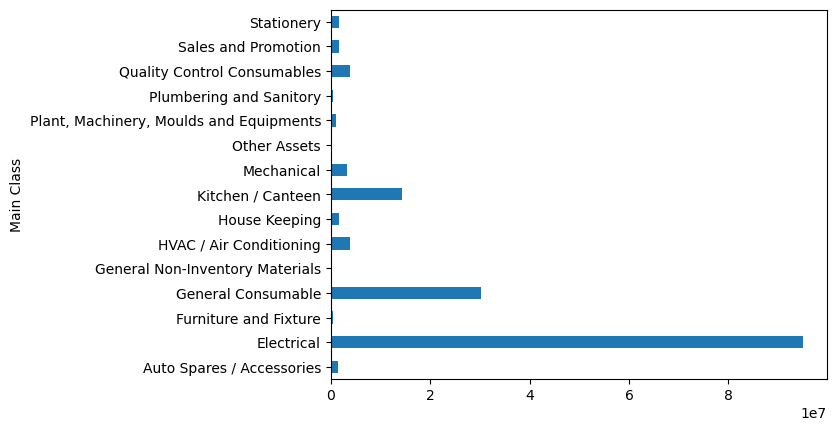

In [20]:
cat_Jul_23_Dec_23.plot.barh()
plt.show()

# Supplier Wise Spend

In [21]:
sup_Jul_22_Jun_23 = Jul_22_Jun_23.groupby(["Main Class", "Vendor Name"])["Receiving Total"].sum()
sup_Jul_22_Jun_23

Main Class                 Vendor Name                              
Auto Spares / Accessories  DEFENCE BATTERY                               1,600.00
                           F. G. INDUSTRIAL EQUIPMENTS (PVT.) LTD.       5,000.00
                           HONDA SHAHRAH-E-FAISAL & DEFENCE WORKSHOP   516,223.60
                           HONDA SOUTH (PVT) LTD.                       97,690.96
                           NATIONAL OIL TRADERS                        399,809.28
                                                                          ...    
Stationery                 M. A. PRINTERS                              277,277.50
                           MUHAMMAD RAZA -CASH PURCHASES                14,500.00
                           Muhammad Raza                                39,400.00
                           PAPER N PLUS                                160,000.00
                           S. R. MARKETING                              92,470.00
Name: Receiving Total, Length

In [22]:
sup_Jul_23_Dec_23 = Jul_23_Dec_23.groupby(["Main Class", "Vendor Name"])["Receiving Total"].sum()
sup_Jul_23_Dec_23.to_csv("check.csv")

# Open Requisitions

In [2]:
# df = pd.read_csv("prs_check(new).csv", encoding="latin1")
df = pd.read_excel("Open Requisitions.xlsx")

In [3]:
df["PR Date"] = pd.to_datetime(df["PR Date"])

In [4]:
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"])

In [5]:
df["PR Year"] = df["PR Date"].dt.year

In [6]:
df["PR Month"] = df["PR Date"].dt.month

In [7]:
df["PR Day"] = df["PR Date"].dt.day

In [8]:
df["Buyer"] = df["Buyer"].fillna("Not Assigned")

In [9]:
df["Department"] = df["Department"].fillna("not available")

In [10]:
open_req = df[df["PR Year"] == 2024]

In [11]:
open_req.to_csv("open_req_2024.csv", index=False)

# Purchase Analysis (Receiving Report)

In [55]:
import pandas as pd

In [56]:
recv = pd.read_excel("Item_Receiving.xlsx")

In [91]:
df = recv.copy()

In [94]:
df.drop(df.iloc[0:9].index, inplace=True)

In [100]:
new_header = df.iloc[0]

In [101]:
df = df[2:]

In [102]:
df.columns = new_header

In [112]:
df.drop(df.iloc[83:87].index, inplace=True)

C:\Users\atif\AppData\Local\Temp\ipykernel_2392\3559274485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.iloc[83:87].index, inplace=True)


In [131]:
df.drop(df.iloc[101:108].index, inplace=True)

C:\Users\atif\AppData\Local\Temp\ipykernel_2392\857342026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.iloc[101:108].index, inplace=True)


In [140]:
df.drop(df.iloc[126:133].index, inplace=True)

C:\Users\atif\AppData\Local\Temp\ipykernel_2392\1418537463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.iloc[126:133].index, inplace=True)


In [141]:
df.to_csv("check.csv")

In [156]:
df[df["Item Code"].isnull()]

9,Sr,Item Code,Item Name,Supplier / Department,PO No.,DC Number,MRR No.,Shipment No.,Lot No.,Potency,Requested Date,Receiving Date,Quantity,UOM,Sample Date,Release Status,Rel / Rej / Hold Date,Manufacturer
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,Computer Equipment / Accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Factor,NaN,NaN,Received,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,General Consumable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,Packing Material,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9214,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Factor,NaN,NaN,Received,NaN,NaN,NaN,NaN,NaN
10868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10869,Raw Material,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df.drop(df[df["Item Code"].isnull()].index, inplace=True)

C:\Users\atif\AppData\Local\Temp\ipykernel_2392\4211676418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Item Code"].isnull()].index, inplace=True)


In [158]:
df

9,Sr,Item Code,Item Name,Supplier / Department,PO No.,DC Number,MRR No.,Shipment No.,Lot No.,Potency,Requested Date,Receiving Date,Quantity,UOM,Sample Date,Release Status,Rel / Rej / Hold Date,Manufacturer
11,1,1308-00748-1002,CARTON RYXON 1gm INJECTION C/P - (ND) - R2 - L...,METIER IMPRESSIONS (PVT) LTD.,15542,22230495,546,NaN,12327,-,2022-12-15 00:00:00,2023-01-11 00:00:00,45600,Numbers,2023-01-12 00:00:00,Released,2023-01-27 00:00:00,NaN
12,2,1307-00297-2010,STICKER RYXON 1gm INJECTION C/P - (Export) - (...,SWS (PVT) LIMITED,14787,5842,547,NaN,12460,-,2022-06-30 00:00:00,2023-01-30 00:00:00,60500,Numbers,2023-02-01 00:00:00,Released,2023-02-16 00:00:00,NaN
13,3,1307-00298-2010,STICKER RYXON 1gm I.M. INJECTION C/P - (Export...,SWS (PVT) LIMITED,14787,5842,548,NaN,12461,-,2022-06-30 00:00:00,2023-01-30 00:00:00,44000,Numbers,2023-02-01 00:00:00,Released,2023-02-16 00:00:00,NaN
14,4,1111-00001-1001,RUBBER STOPPER BROMO BUTYL GREY 20mm - Common ...,ANHUI HUAFENG PHARMACEUTICAL RUBBER CO. LTD.,14409,HF2212222,549,121.1,12463,-,2022-07-14 00:00:00,2023-01-30 00:00:00,1500000,Numbers,2023-01-31 00:00:00,Released,2023-02-01 00:00:00,NaN
15,5,1110-00004-1001,MOULDED CLEAR GLASS VIAL 15ml - Common Material,"SHANDONG PHARMACEUTICAL GLASS CO., LTD.",13488,BPL20220002,550,123.1,12500,-,2022-04-05 00:00:00,2023-02-03 00:00:00,653400,Numbers,2023-02-06 00:00:00,Released,2023-02-06 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,454,1001-00021-0000,DICLOFENAC SODIUM,AMOLI ORGANICS PVT. LTD.,16040,3231030669,13992,1249.5,14409,-,2023-04-05 00:00:00,2024-02-03 00:00:00,800,Kilogram,NaN,Receiving Quarantine Lot,NaN,AMOLI ORGANICS PVT. LTD.
11326,455,1001-00021-0000,DICLOFENAC SODIUM,AMOLI ORGANICS PVT. LTD.,16040,3231030669,13993,1249.2,14410,-,2023-04-05 00:00:00,2024-02-03 00:00:00,1050,Kilogram,NaN,Receiving Quarantine Lot,NaN,AMOLI ORGANICS PVT. LTD.
11327,456,1001-00021-0000,DICLOFENAC SODIUM,AMOLI ORGANICS PVT. LTD.,16040,3231030669,13994,1249.3,14411,-,2023-04-05 00:00:00,2024-02-03 00:00:00,1075,Kilogram,NaN,Receiving Quarantine Lot,NaN,AMOLI ORGANICS PVT. LTD.
11328,457,1001-00021-0000,DICLOFENAC SODIUM,AMOLI ORGANICS PVT. LTD.,16040,3231030669,13995,1249.4,14412,-,2023-04-05 00:00:00,2024-02-03 00:00:00,1075,Kilogram,NaN,Receiving Quarantine Lot,NaN,AMOLI ORGANICS PVT. LTD.
